In [136]:
import pandas as pd
import numpy as np

#Get the libaries of Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Get Library for Train Test Split
from sklearn.model_selection import train_test_split

##Get the libaries of  Machine Learning Phase
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier

##Get the libaries to measure Test Prediction Metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [137]:
bank=pd.read_csv("bank-additional-full.csv", header = 'infer')
bank_copy=bank.copy()

## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(bank_copy.shape))
print (bank_copy.info())

The shape of the  data is (row, column):(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Age                                                                                 41188 non-null  int64  
 1   Job                                                                                 41188 non-null  object 
 2   MaritalStatus                                                                       41188 non-null  object 
 3   Education                                                                           41188 non-null  object 
 4   CreditinDefault                                                                     41188 non-null  object 
 5   HasHousingLoan                             

In [138]:
bank_copy.head()

,Age,Job,MaritalStatus,Education,CreditinDefault,HasHousingLoan,HasPersonalLoan,ContactType,LastContactMonth,LastContactDayofWeek,LastContact Durationinsecs,NoofTimes Contacted,NoofDaysContactedsinceLastCampaign (999 means client was not previously contacted),NoofTimesContactedinLastCampaign,Outcome of Last Campaign,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3 Month Rate,Number of Employees,TermDepositAccepted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [139]:
bank_copy.dtypes

Age                                                                                     int64
Job                                                                                    object
MaritalStatus                                                                          object
Education                                                                              object
CreditinDefault                                                                        object
HasHousingLoan                                                                         object
HasPersonalLoan                                                                        object
ContactType                                                                            object
LastContactMonth                                                                       object
LastContactDayofWeek                                                                   object
LastContact Durationinsecs                                  

In [140]:
#Checking out the statistical parameters
bank_copy.describe()

,Age,LastContact Durationinsecs,NoofTimes Contacted,NoofDaysContactedsinceLastCampaign (999 means client was not previously contacted),NoofTimesContactedinLastCampaign,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3 Month Rate,Number of Employees
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [141]:
bank_copy.columns = ['Age', 'Job', 'MaritalStatus', 'Education', 'CreditinDefault', 'HasHousingLoan', 'HasPersonalLoan', 
'ContactType', 'LastContactMonth', 'LastContactDayofWeek', 'LastContactDurationinsecs', 'NoofTimesContacted', 
'NoofDaysContactedsinceLastCampaign', 'NoofTimesContactedinLastCampaign', 'OutcomeofLastCampaign', 'EmploymentVariationRate', 
'ConsumerPriceIndex', 'ConsumerConfidenceIndex', 'Euribor3MonthRate', 'NumberofEmployees', 'TermDepositAccepted']

In [142]:
#Checking out the categories and their respective counts in each feature
print("Job:",bank_copy.Job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",bank_copy.MaritalStatus.value_counts(),sep = '\n')
print("-"*40)
print("Education:",bank_copy.Education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",bank_copy.CreditinDefault.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",bank_copy.HasHousingLoan.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",bank_copy.HasPersonalLoan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",bank_copy.ContactType.value_counts(),sep = '\n')
print("-"*40)
print("Month:",bank_copy.LastContactMonth.value_counts(),sep = '\n')
print("-"*40)
print("Day:",bank_copy.LastContactDayofWeek.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",bank_copy.OutcomeofLastCampaign.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",bank_copy.TermDepositAccepted.value_counts(),sep = '\n')
print("-"*40)
print("No of times contacted in this campaign:",bank_copy.NoofTimesContactedinLastCampaign.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: Job, dtype: int64
----------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: MaritalStatus, dtype: int64
----------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: Education, dtype: int64
----------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: CreditinDefault, dtype: int64
----------------------------------------
Housing loan:
yes        21576
no         18622

In [143]:
print('Data columns with null values:',bank_copy.isnull().sum(), sep = '\n')

Data columns with null values:
Age                                   0
Job                                   0
MaritalStatus                         0
Education                             0
CreditinDefault                       0
HasHousingLoan                        0
HasPersonalLoan                       0
ContactType                           0
LastContactMonth                      0
LastContactDayofWeek                  0
LastContactDurationinsecs             0
NoofTimesContacted                    0
NoofDaysContactedsinceLastCampaign    0
NoofTimesContactedinLastCampaign      0
OutcomeofLastCampaign                 0
EmploymentVariationRate               0
ConsumerPriceIndex                    0
ConsumerConfidenceIndex               0
Euribor3MonthRate                     0
NumberofEmployees                     0
TermDepositAccepted                   0
dtype: int64


In [144]:
bank_copy['Age'] = np.nan
print('Data columns with null values:',bank_copy.isnull().sum(), sep = '\n')

Data columns with null values:
Age                                   41188
Job                                       0
MaritalStatus                             0
Education                                 0
CreditinDefault                           0
HasHousingLoan                            0
HasPersonalLoan                           0
ContactType                               0
LastContactMonth                          0
LastContactDayofWeek                      0
LastContactDurationinsecs                 0
NoofTimesContacted                        0
NoofDaysContactedsinceLastCampaign        0
NoofTimesContactedinLastCampaign          0
OutcomeofLastCampaign                     0
EmploymentVariationRate                   0
ConsumerPriceIndex                        0
ConsumerConfidenceIndex                   0
Euribor3MonthRate                         0
NumberofEmployees                         0
TermDepositAccepted                       0
dtype: int64


In [145]:
bank_copy = bank.copy()
bank_copy.columns = ['Age', 'Job', 'MaritalStatus', 'Education', 'CreditinDefault', 'HasHousingLoan', 'HasPersonalLoan', 
'ContactType', 'LastContactMonth', 'LastContactDayofWeek', 'LastContactDurationinsecs', 'NoofTimesContacted', 
'NoofDaysContactedsinceLastCampaign', 'NoofTimesContactedinLastCampaign', 'OutcomeofLastCampaign', 'EmploymentVariationRate', 
'ConsumerPriceIndex', 'ConsumerConfidenceIndex', 'Euribor3MonthRate', 'NumberofEmployees', 'TermDepositAccepted']

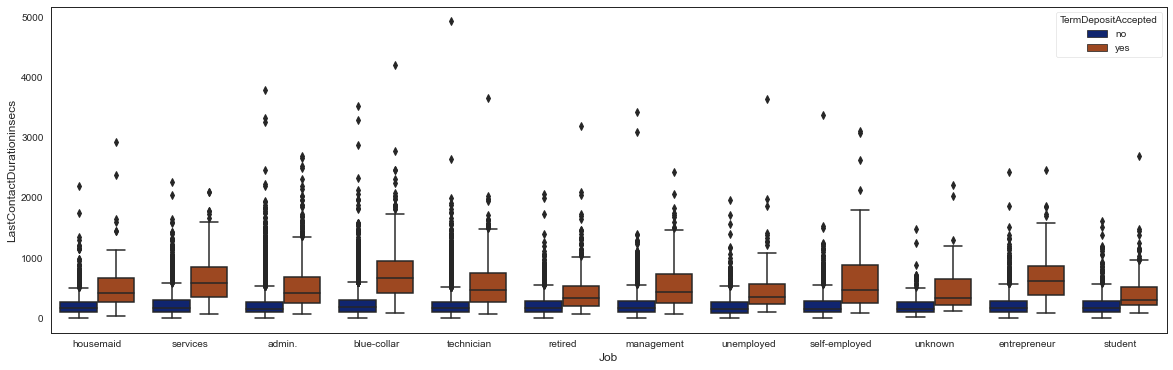

In [146]:
fig = plt.figure(figsize=(20,6))
sns.boxplot(x="Job", y="LastContactDurationinsecs", data=bank_copy, hue="TermDepositAccepted", palette='dark') #,

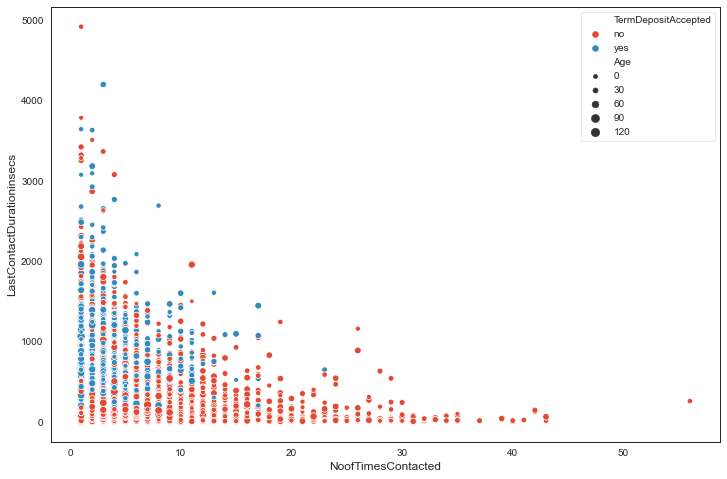

In [147]:
sns.scatterplot(x='NoofTimesContacted', y='LastContactDurationinsecs', hue='TermDepositAccepted', size = 'Age', data=bank_copy); 

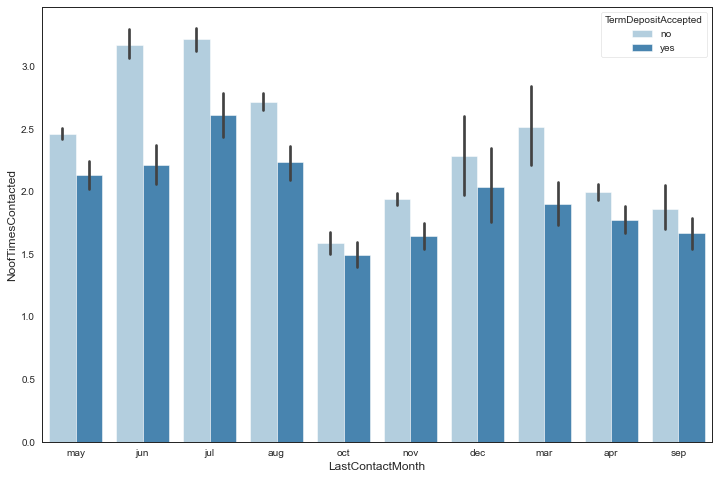

In [148]:
sns.barplot(x='LastContactMonth',y='NoofTimesContacted', hue = 'TermDepositAccepted', data=bank_copy, 
        palette='Blues') #,palette = "dark"/"coolwarm"

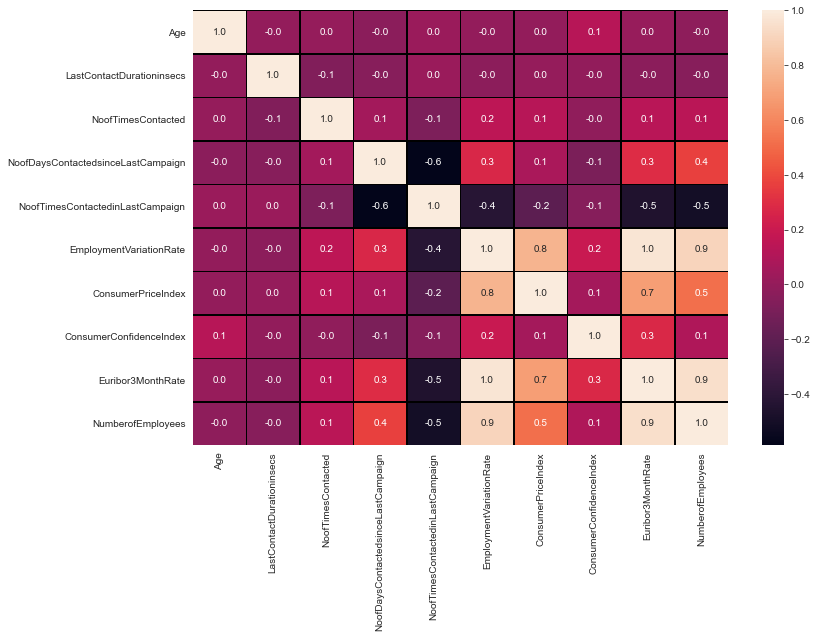

In [149]:
sns.heatmap(bank_copy.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f")

In [150]:
bank_copy["TermDepositAccepted0and1"] = bank_copy["TermDepositAccepted"].apply(lambda x: 0 if x == "no" else 1)
bank_copy[["TermDepositAccepted0and1","TermDepositAccepted"]]

,TermDepositAccepted0and1,TermDepositAccepted
0,0,no
1,0,no
2,0,no
3,0,no
4,0,no
...,...,...
41183,1,yes
41184,0,no
41185,0,no
41186,1,yes


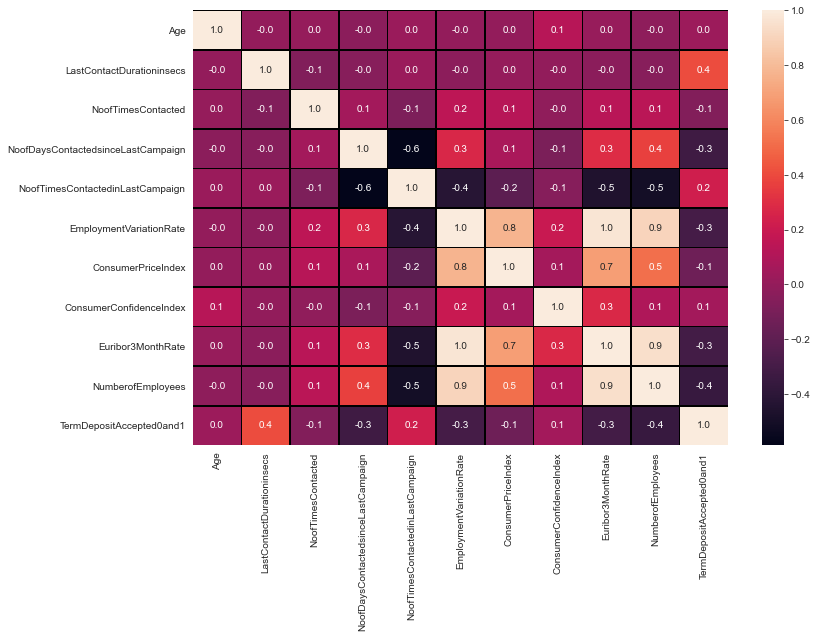

In [151]:
sns.heatmap(bank_copy.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f")

# Feature Engineering

0 Age
1 LastContactDurationinsecs
2 NoofTimesContacted
3 NoofDaysContactedsinceLastCampaign
4 NoofTimesContactedinLastCampaign


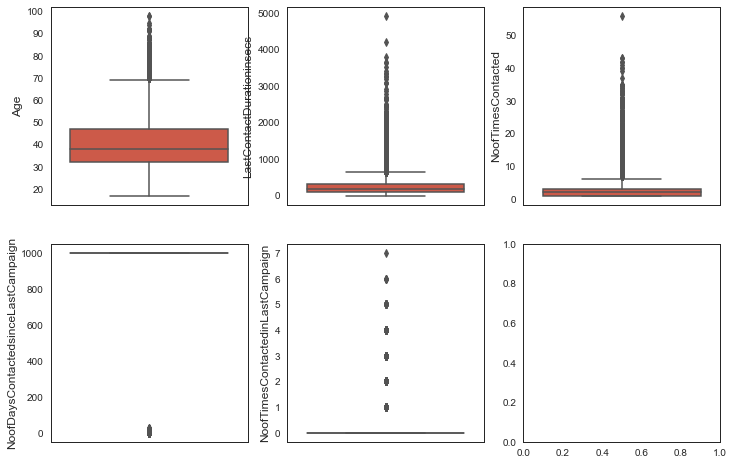

In [152]:
#Handling Outliers
outlierscol = ['Age','LastContactDurationinsecs','NoofTimesContacted','NoofDaysContactedsinceLastCampaign',
               'NoofTimesContactedinLastCampaign']
fig, axes = plt.subplots(nrows=2, ncols=3) #Can Use Unpacking as well fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

for i in range(2):
    for j in range(3):
        colnum = i * 3 + j 
        if colnum < 5:
            print(colnum, outlierscol[colnum])
            sns.boxplot(y = outlierscol[colnum],data=bank_copy, ax=axes[i, j])

0 Age
1 LastContactDurationinsecs
2 NoofTimesContacted
3 NoofDaysContactedsinceLastCampaign
4 NoofTimesContactedinLastCampaign


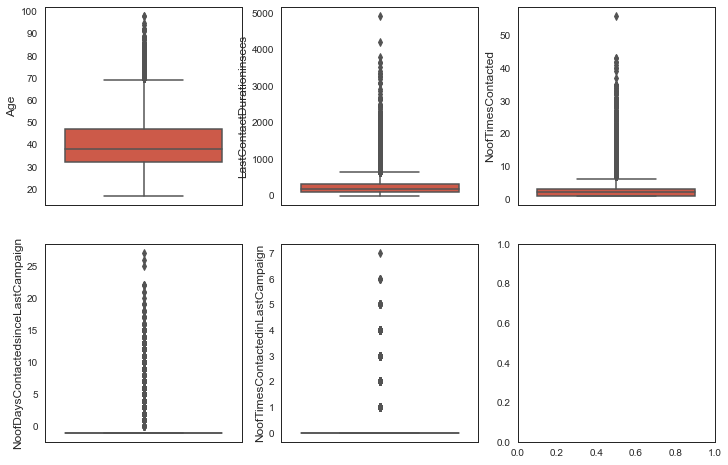

In [153]:
bank_copy['NoofDaysContactedsinceLastCampaign'] = bank_copy['NoofDaysContactedsinceLastCampaign'].apply(lambda x: x if x < 999 else -1) 
#Handling Outliers
outlierscol = ['Age','LastContactDurationinsecs','NoofTimesContacted','NoofDaysContactedsinceLastCampaign',
               'NoofTimesContactedinLastCampaign']
fig, axes = plt.subplots(nrows=2, ncols=3) #Can Use Unpacking as well fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

for i in range(2):
    for j in range(3):
        colnum = i * 3 + j 
        if colnum < 5:
            print(colnum, outlierscol[colnum])
            sns.boxplot(y = outlierscol[colnum],data=bank_copy, ax=axes[i, j])

In [154]:
#Handling Outliers for age campaign duration
numerical_features=['Age','LastContactDurationinsecs','NoofTimesContacted']   #3 Continuous variable
for cols in numerical_features: #looping through the list
    Q1 = bank_copy[cols].quantile(0.25)
    Q3 = bank_copy[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (bank_copy[cols] >= Q1 - 1.5 * IQR) & (bank_copy[cols] <= Q3 + 1.5 *IQR)
    bank_copy=bank_copy.loc[filter]
print('Count after Outlier clipping ' , bank_copy.count()[0])
filter

Count after Outlier clipping  35535


0        True
1        True
2        True
3        True
4        True
         ... 
41181    True
41182    True
41184    True
41185    True
41186    True
Name: NoofTimesContacted, Length: 37784, dtype: bool

In [155]:
#Clubbing similar values
bank_features=bank_copy.copy()
bank_features.loc[(bank_features['Education'] == 'basic.9y') | (bank_features['Education'] == 'basic.6y') | 
                  (bank_features['Education'] == 'basic.4y'), 'Education'] = 'middle.school'
bank_features['Education'].value_counts()

middle.school          10679
university.degree      10551
high.school             8281
professional.course     4551
unknown                 1459
illiterate                14
Name: Education, dtype: int64

In [156]:
bank_features.loc[:, ['LastContactMonth', 'LastContactDayofWeek']].head(5)

,LastContactMonth,LastContactDayofWeek
0,may,mon
1,may,mon
2,may,mon
3,may,mon
4,may,mon


In [157]:
#Encoding the categories in month and day of week to the respective numbers.
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
bank_features['LastContactMonth']= bank_features['LastContactMonth'].map(month_dict) 
bank_features.loc[:, ['LastContactMonth', 'LastContactDayofWeek']].head(300)
day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6,'sat':7,'sun':1}
bank_features['LastContactDayofWeek']= bank_features['LastContactDayofWeek'].map(day_dict) 
bank_features.loc[:, ['LastContactMonth', 'LastContactDayofWeek']].head(300)

,LastContactMonth,LastContactDayofWeek
0,5,2
1,5,2
2,5,2
3,5,2
4,5,2
...,...,...
314,5,2
315,5,2
316,5,2
317,5,2


# Ordinal Number Encoding

In [158]:
dictionary={'yes':1,'no':0,'unknown':-1}
bank_features['HasHousingLoan']=bank_features['HasHousingLoan'].map(dictionary)
bank_features['CreditinDefault']=bank_features['CreditinDefault'].map(dictionary)
bank_features['HasPersonalLoan']=bank_features['HasPersonalLoan'].map(dictionary)
bank_features.loc[:,['HasHousingLoan','CreditinDefault','HasPersonalLoan','TermDepositAccepted', 'TermDepositAccepted0and1']].head()

,HasHousingLoan,CreditinDefault,HasPersonalLoan,TermDepositAccepted,TermDepositAccepted0and1
0,0,0,0,no,0
1,0,-1,0,no,0
2,1,0,0,no,0
3,0,0,0,no,0
4,0,0,1,no,0


# One Hot Encoding using get_dummies

In [159]:
dummy_contact=pd.get_dummies(bank_features['ContactType'], prefix='dummy',drop_first=True)
bank_features = pd.concat([bank_features,dummy_contact],axis=1)
bank_features.drop(['ContactType'],axis=1, inplace=True)
bank_features.loc[:,['dummy_telephone']].head()

,dummy_telephone
0,1
1,1
2,1
3,1
4,1


In [160]:
dummy_outcome=pd.get_dummies(bank_features['OutcomeofLastCampaign'], prefix='dummy',drop_first=True)
bank_features = pd.concat([bank_features,dummy_outcome],axis=1)
bank_features.drop(['OutcomeofLastCampaign'],axis=1, inplace=True)
bank_features.loc[:,['dummy_success','dummy_nonexistent']].head()

,dummy_success,dummy_nonexistent
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [161]:
dummy_maritalstatus=pd.get_dummies(bank_features['MaritalStatus'], prefix='dummy',drop_first=True)
dummy_maritalstatus
bank_features.drop(columns = ['MaritalStatus'], inplace = True)
bank_features = pd.concat([bank_features,dummy_maritalstatus],axis=1)

In [162]:
bank_features.head()

,Age,Job,Education,CreditinDefault,HasHousingLoan,HasPersonalLoan,LastContactMonth,LastContactDayofWeek,LastContactDurationinsecs,NoofTimesContacted,NoofDaysContactedsinceLastCampaign,NoofTimesContactedinLastCampaign,EmploymentVariationRate,ConsumerPriceIndex,ConsumerConfidenceIndex,Euribor3MonthRate,NumberofEmployees,TermDepositAccepted,TermDepositAccepted0and1,dummy_telephone,dummy_nonexistent,dummy_success,dummy_married,dummy_single,dummy_unknown
0,56,housemaid,middle.school,0,0,0,5,2,261,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,1,1,0,1,0,0
1,57,services,high.school,-1,0,0,5,2,149,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,1,1,0,1,0,0
2,37,services,high.school,0,1,0,5,2,226,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,1,1,0,1,0,0
3,40,admin.,middle.school,0,0,0,5,2,151,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,1,1,0,1,0,0
4,56,services,high.school,0,0,1,5,2,307,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,1,1,0,1,0,0


# Frequency encoding

In [163]:
bank_job=bank_features['Job'].value_counts().to_dict()
bank_ed=bank_features['Education'].value_counts().to_dict()
bank_features['Job']=bank_features['Job'].map(bank_job)
bank_features['Education']=bank_features['Education'].map(bank_ed)
bank_features.loc[:,['Job','Education']].head()

,Job,Education
0,896,10679
1,3452,8281
2,3452,8281
3,9107,10679
4,3452,8281


# Standardization of numerical variables

In [164]:
bank_features['TermDepositAccepted'] = bank_features['TermDepositAccepted0and1']
bank_features.drop(columns = 'TermDepositAccepted0and1', inplace = True)
bank_features.head()

,Age,Job,Education,CreditinDefault,HasHousingLoan,HasPersonalLoan,LastContactMonth,LastContactDayofWeek,LastContactDurationinsecs,NoofTimesContacted,NoofDaysContactedsinceLastCampaign,NoofTimesContactedinLastCampaign,EmploymentVariationRate,ConsumerPriceIndex,ConsumerConfidenceIndex,Euribor3MonthRate,NumberofEmployees,TermDepositAccepted,dummy_telephone,dummy_nonexistent,dummy_success,dummy_married,dummy_single,dummy_unknown
0,56,896,10679,0,0,0,5,2,261,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,1,0,0
1,57,3452,8281,-1,0,0,5,2,149,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,1,0,0
2,37,3452,8281,0,1,0,5,2,226,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,1,0,0
3,40,9107,10679,0,0,0,5,2,151,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,1,0,0
4,56,3452,8281,0,0,1,5,2,307,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,1,0,0


In [165]:
bank_scale.columns

Index(['Age', 'Job', 'Education', 'CreditinDefault', 'HasHousingLoan',
       'HasPersonalLoan', 'LastContactMonth', 'LastContactDayofWeek',
       'LastContactDurationinsecs', 'NoofTimesContacted',
       'NoofDaysContactedsinceLastCampaign',
       'NoofTimesContactedinLastCampaign', 'EmploymentVariationRate',
       'ConsumerPriceIndex', 'ConsumerConfidenceIndex', 'Euribor3MonthRate',
       'NumberofEmployees', 'TermDepositAccepted', 'dummy_telephone',
       'dummy_nonexistent', 'dummy_success', 'dummy_married', 'dummy_single',
       'dummy_unknown'],
      dtype='object')

In [166]:
bank_scale=bank_features.copy()
Categorical_variables=['Job', 'Education', 'CreditinDefault', 'HasHousingLoan', 'HasPersonalLoan', 'LastContactMonth',
       'LastContactDayofWeek', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'dummy_married', 'TermDepositAccepted', 'dummy_single', 'dummy_unknown']


feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]
print('Feature Scale ', feature_scale)

Feature Scale  ['Age', 'LastContactDurationinsecs', 'NoofTimesContacted', 'NoofDaysContactedsinceLastCampaign', 'NoofTimesContactedinLastCampaign', 'EmploymentVariationRate', 'ConsumerPriceIndex', 'ConsumerConfidenceIndex', 'Euribor3MonthRate', 'NumberofEmployees']


In [167]:
bank_scale[feature_scale].head()

,Age,LastContactDurationinsecs,NoofTimesContacted,NoofDaysContactedsinceLastCampaign,NoofTimesContactedinLastCampaign,EmploymentVariationRate,ConsumerPriceIndex,ConsumerConfidenceIndex,Euribor3MonthRate,NumberofEmployees
0,56,261,1,-1,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,-1,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,-1,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,-1,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,-1,0,1.1,93.994,-36.4,4.857,5191.0


In [168]:
scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale]) 
scaleddataset = pd.DataFrame(scaler.transform(bank_scale[feature_scale]))

In [169]:
scaleddataset.head()

,0,1,2,3,4,5,6,7,8,9
0,1.694589,0.386969,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
1,1.797914,-0.412615,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
2,-0.268597,0.137099,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
3,0.041380,-0.398337,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
4,1.694589,0.715370,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946


In [170]:
scaleddataset.columns = bank_scale[feature_scale].columns
scaleddataset.head()

,Age,LastContactDurationinsecs,NoofTimesContacted,NoofDaysContactedsinceLastCampaign,NoofTimesContactedinLastCampaign,EmploymentVariationRate,ConsumerPriceIndex,ConsumerConfidenceIndex,Euribor3MonthRate,NumberofEmployees
0,1.694589,0.386969,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
1,1.797914,-0.412615,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
2,-0.268597,0.137099,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
3,0.041380,-0.398337,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
4,1.694589,0.715370,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946


In [171]:
StandardScalerscaled_data = pd.concat([bank_scale[Categorical_variables].reset_index(drop=True),
                    scaleddataset],
                    axis=1)
StandardScalerscaled_data.head()

,Job,Education,CreditinDefault,HasHousingLoan,HasPersonalLoan,LastContactMonth,LastContactDayofWeek,dummy_telephone,dummy_nonexistent,dummy_success,dummy_married,TermDepositAccepted,dummy_single,dummy_unknown,Age,LastContactDurationinsecs,NoofTimesContacted,NoofDaysContactedsinceLastCampaign,NoofTimesContactedinLastCampaign,EmploymentVariationRate,ConsumerPriceIndex,ConsumerConfidenceIndex,Euribor3MonthRate,NumberofEmployees
0,896,10679,0,0,0,5,2,1,1,0,1,0,0,0,1.694589,0.386969,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
1,3452,8281,-1,0,0,5,2,1,1,0,1,0,0,0,1.797914,-0.412615,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
2,3452,8281,0,1,0,5,2,1,1,0,1,0,0,0,-0.268597,0.137099,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
3,9107,10679,0,0,0,5,2,1,1,0,1,0,0,0,0.041380,-0.398337,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
4,3452,8281,0,0,1,5,2,1,1,0,1,0,0,0,1.694589,0.715370,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946


In [172]:
scaled_data = StandardScalerscaled_data
scaled_data.head()

,Job,Education,CreditinDefault,HasHousingLoan,HasPersonalLoan,LastContactMonth,LastContactDayofWeek,dummy_telephone,dummy_nonexistent,dummy_success,dummy_married,TermDepositAccepted,dummy_single,dummy_unknown,Age,LastContactDurationinsecs,NoofTimesContacted,NoofDaysContactedsinceLastCampaign,NoofTimesContactedinLastCampaign,EmploymentVariationRate,ConsumerPriceIndex,ConsumerConfidenceIndex,Euribor3MonthRate,NumberofEmployees
0,896,10679,0,0,0,5,2,1,1,0,1,0,0,0,1.694589,0.386969,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
1,3452,8281,-1,0,0,5,2,1,1,0,1,0,0,0,1.797914,-0.412615,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
2,3452,8281,0,1,0,5,2,1,1,0,1,0,0,0,-0.268597,0.137099,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
3,9107,10679,0,0,0,5,2,1,1,0,1,0,0,0,0.041380,-0.398337,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
4,3452,8281,0,0,1,5,2,1,1,0,1,0,0,0,1.694589,0.715370,-0.813041,-0.167787,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946


# Feature Selection

In [173]:
X=scaled_data.drop(['TermDepositAccepted'],axis=1)
y=scaled_data['TermDepositAccepted']

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

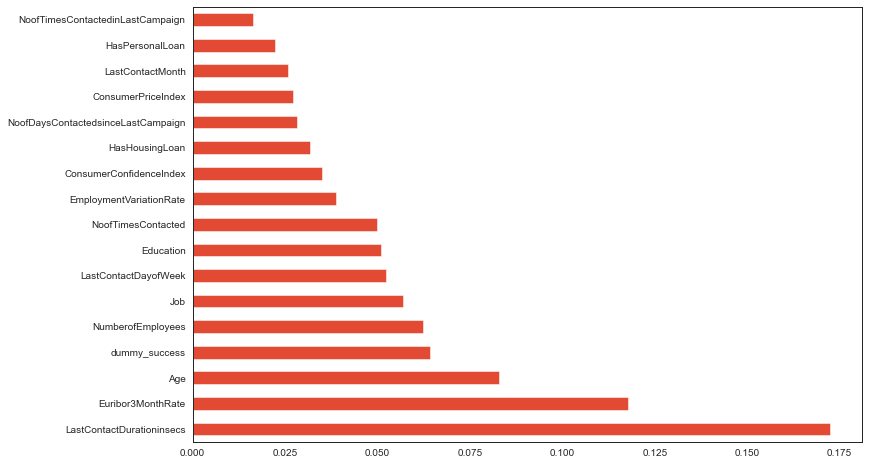

In [174]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

# Modelling Data after Feature Selection

# Train and Test Split (80:20)

In [175]:
X=scaled_data.drop(['NoofDaysContactedsinceLastCampaign','NoofTimesContactedinLastCampaign', 'HasPersonalLoan', 
                    'HasHousingLoan', 'LastContactMonth', 'ConsumerPriceIndex', 'TermDepositAccepted'],axis=1)
y=scaled_data['TermDepositAccepted']

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (28428, 17)
Input Test: (7107, 17)
Output Training: (28428,)
Output Test: (7107,)


# Modelling Data

In [176]:
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.87417299828737
Decision Tree Test Accuracy: 0.6573474728925962
KNN Test Accuracy: 0.8696988254553881
SVC Test Accuracy: 0.9191220066392332
Naive Bayes Test Accuracy: 0.7705666630924178


#### Logistic regression with Hyperparameter tuning

In [177]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=0.12648552168552957, random_state=0)
The mean accuracy of the model is: 0.92894329534262


In [178]:
logreg = LogisticRegression(C=0.18420699693267145, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


# Evaluating the Models

In [179]:
#Evaluate Logistic Regression classifier
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[6405  137]
 [ 369  196]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      6542
           1       0.59      0.35      0.44       565

    accuracy                           0.93      7107
   macro avg       0.77      0.66      0.70      7107
weighted avg       0.92      0.93      0.92      7107



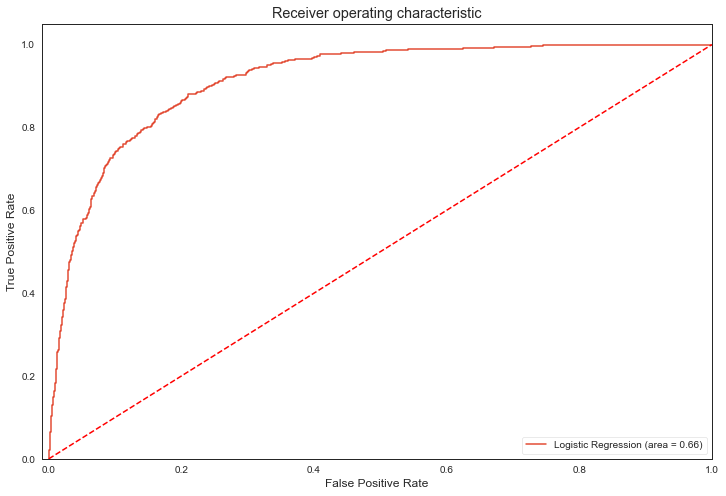

In [180]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [181]:
#Evaluate Support vector classifier
svc_classifier = SVC(random_state = 0)
svc_classifier.fit(X_train,y_train)
y_pred=svc_classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.920500914591248
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      6542
           1       0.00      0.00      0.00       565

    accuracy                           0.92      7107
   macro avg       0.46      0.50      0.48      7107
weighted avg       0.85      0.92      0.88      7107



# Modelling Data without Feature Selection

# Train and Test Split (80:20)

In [182]:
X=scaled_data.drop(['TermDepositAccepted'],axis=1)
y=scaled_data['TermDepositAccepted']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)


Input Training: (28428, 23)
Input Test: (7107, 23)
Output Training: (28428,)
Output Test: (7107,)


# Modelling Data

In [183]:
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))


Logistic Regression Test Accuracy: 0.8801960852947749
Decision Tree Test Accuracy: 0.6554618613135508
KNN Test Accuracy: 0.8443118998251575
SVC Test Accuracy: 0.9191220066392332
Naive Bayes Test Accuracy: 0.7740295241397213


In [184]:
#### Logistic regression with Hyperparameter tuning
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

logreg = LogisticRegression(C=0.18420699693267145, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


LogisticRegression(C=0.18420699693267145, random_state=0)
The mean accuracy of the model is: 0.9292247080343323
Accuracy of logistic regression classifier on test set: 0.93


# Evaluating the Models

In [185]:
#Evaluate Logistic Regression classifier
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[6427  115]
 [ 388  177]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6542
           1       0.61      0.31      0.41       565

    accuracy                           0.93      7107
   macro avg       0.77      0.65      0.69      7107
weighted avg       0.92      0.93      0.92      7107



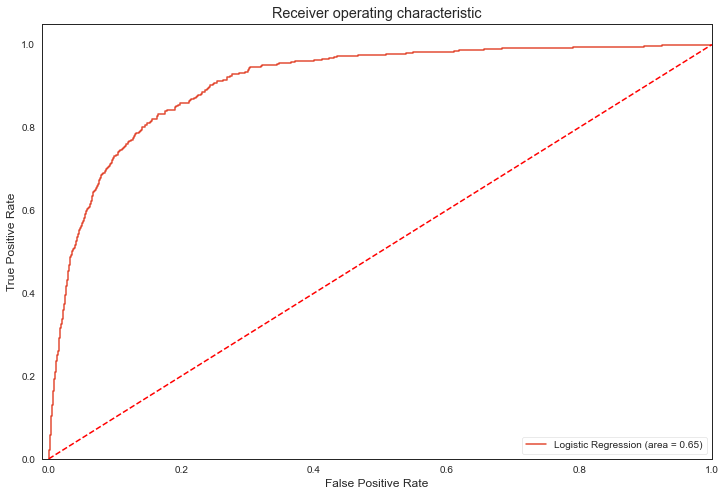

In [186]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()



In [187]:
#Evaluate Support vector classifier
svc_classifier = SVC(random_state = 0)
svc_classifier.fit(X_train,y_train)
y_pred=svc_classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.920500914591248
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      6542
           1       0.00      0.00      0.00       565

    accuracy                           0.92      7107
   macro avg       0.46      0.50      0.48      7107
weighted avg       0.85      0.92      0.88      7107

